**Msc Applied Artificial Intelligence**

**Course: Data-Science-and-Data-Analytics**

ITESM

Data Analysis using Pandas and Python

---

*   Name: Sebastian Ezequiel Coronado Rivera
*   Student ID: A01212824


---

In this activity, you'll use the data file `LaqnData.csv`. Each row in this dataset shows an hourly measurement record of one of the following five air pollutants:

*   `NO` (nitric oxide)
*   `NO2` (nitrogen dioxide)
*   `NOX` (nitrogen oxides)
*   `PM10` (suspended particles with an aerodynamic diameter equal to or less than 10 micrometers)
*   `PM2.5` (suspended particles with an aerodynamic diameter equal to or less than 2.5 micrometers)

Data was collected at one location in London throughout 2017.

**IMPORTANT NOTE:** Please be sure to answer all questions *explicitly*.


1. Download the file: `LaqnData.csv` and save all its records in a data frame (`air_df`).
* Observe the structure and content of the data frame using the attributes and methods studied (`shape`, `columns`, `head()`, `tail()`, `dtypes`).
* Calculate the percentage of missing values ​​per column.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
#DIR = "/content/drive/MyDrive/Colab Notebooks"
#os.chdir(DIR)


air_df = pd.read_csv('LaqnData.csv')
#air_df.describe()
print('Structure and content of the data frame')
print('\n\n1. Shape \n\n', air_df.shape)
print('\n\n2. COLUMNS \n\n ',air_df.columns)
print('\n\n3. HEAD \n\n',air_df.head())
print('\n\n4. SHAPE \n\n',air_df.tail())
print('\n\n5. DTYPES \n\n',air_df.dtypes)

print('\n\nPercentage of missing values\n\n')
missing_data = air_df.isnull().sum() / len(air_df) * 100
print(missing_data)

Structure and content of the data frame


1. Shape 

 (43800, 6)


2. COLUMNS 

  Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')


3. HEAD 

   Site Species   ReadingDateTime  Value   Units Provisional or Ratified
0  CT3      NO  01/01/2017 00:00    3.5  ug m-3                       R
1  CT3      NO  01/01/2017 01:00    3.6  ug m-3                       R
2  CT3      NO  01/01/2017 02:00    2.2  ug m-3                       R
3  CT3      NO  01/01/2017 03:00    2.1  ug m-3                       R
4  CT3      NO  01/01/2017 04:00    3.3  ug m-3                       R


4. SHAPE 

       Site Species   ReadingDateTime  Value   Units Provisional or Ratified
43795  CT3   PM2.5  31/12/2017 19:00   -2.0  ug m-3                       R
43796  CT3   PM2.5  31/12/2017 20:00    6.0  ug m-3                       R
43797  CT3   PM2.5  31/12/2017 21:00    5.0  ug m-3                       R
43798  CT3   PM2.5  31/12/2017 22:0

2. Get the number of unique values ​​per column (`nunique()`) to answer:

* How many measurements were made?
* How many air pollutants (`Species`) were analyzed?
* Which columns add no informative value because the value is the same throughout the dataset? Remove them from the dataframe.
* The `Units` column also has no informative value. Check it with the `unique()` function and remove it from the dataframe.

In [4]:
print('Unique values ​​per column\n')
print(air_df.nunique())

print('\n\nTotal measurements\n') #Since there is no column that counts the measurements, we will use the row count to relate it to this data.
num_measurements = len(air_df)
print("Approximate number of measurements:", num_measurements)

print('\n\nContaminants Analyzed:\n')
num_contaminants = air_df['Species'].nunique()
print(num_contaminants)

print('\n\nColumns with unique value:\n')
columns_uniquevalue = air_df.columns[air_df.nunique() == 1]
print(columns_uniquevalue)
air_df = air_df.drop(columns_uniquevalue, axis=1)

print('\n\nVerifying units column:\n')
print(air_df['Units'].unique())
air_df = air_df.drop('Units', axis=1)

print('\n\nVerifying Data frame after cleaning:\n')
air_df.columns

Unique values ​​per column

Site                          1
Species                       5
ReadingDateTime            8760
Value                      1847
Units                         3
Provisional or Ratified       1
dtype: int64


Total measurements

Approximate number of measurements: 43800


Contaminants Analyzed:

5


Columns with unique value:

Index(['Site', 'Provisional or Ratified'], dtype='object')


Verifying units column:

['ug m-3' 'ug m-3 as NO2' 'ug/m3']


Verifying Data frame after cleaning:



Index(['Species', 'ReadingDateTime', 'Value'], dtype='object')

3. Count the values ​​by category (`value_counts()`) for the `Species` column and determine if the readings for each contaminant match the total number of measurements.

In [9]:
print('Total measurements:\n')
total_measurements = len(air_df)
print(total_measurements)

print('\n\nMissing measurements:\n')
valuenan = air_df[air_df['Value'].isnull()]
countvaluenan = len(valuenan)
print(countvaluenan)

print('\n\nCount removing missing measurements:\n')
nancleaning = air_df.dropna(subset=['Value'])
countafternancleaning = len(nancleaning)
print(countafternancleaning)

print('\n\nCount measurements by contaminant:\n')
pollutant_count = air_df['Species'].value_counts()
print(pollutant_count)

print('\n\nSum of contaminant counts:\n')
count_sum = pollutant_count.sum()
print(count_sum)

if countafternancleaning == count_sum:
    print("\n\nThe contaminant count matches the total number of measurements with no missing values ​​in 'Value'.")
else:
    print("\n\nThere is a difference count of", countvaluenan,"between the contaminant count",count_sum, "and the total measurements removing Nan values",countafternancleaning)

air_df = air_df. dropna(subset=['Value'])
print('\n\nMeasurement count by contaminants after cleaning with NaN values:\n')
clean_contaminant_count = air_df['Species'].value_counts()
print(clean_contaminant_count)

print('\n\nSum of contaminant counts after cleaning:\n')
clean_count_sum = clean_contaminant_count.sum()
print(clean_count_sum)


Total measurements:

40570


Missing measurements:

0


Count removing missing measurements:

40570


Count measurements by contaminant:

Species
NO       8660
NO2      8660
NOX      8660
PM10     8657
PM2.5    5933
Name: count, dtype: int64


Sum of contaminant counts:

40570


The contaminant count matches the total number of measurements with no missing values ​​in 'Value'.


Measurement count by contaminants after cleaning with NaN values:

Species
NO       8660
NO2      8660
NOX      8660
PM10     8657
PM2.5    5933
Name: count, dtype: int64


Sum of contaminant counts after cleaning:

40570


4. Use the `groupby()` function to determine the average value per contaminant.

In [10]:
average_per_pollutant = air_df.groupby('Species')['Value'].mean()

print("\nAverage value per pollutant:\n\n")
print(average_per_pollutant)


Average value per pollutant:


Species
NO       15.045115
NO2      38.010185
NOX      61.078661
PM10     22.551704
PM2.5    14.999831
Name: Value, dtype: float64


5. The dataset is in a long format. Apply the appropriate function to convert it to a wide format (`ReadingDateTime` as the index and each contaminant in a separate column). Name the resulting data frame `pvt_df`.

In [11]:
print("\nConversion to wide format:\n\n")

pvt_df = air_df.pivot_table(index='ReadingDateTime', columns='Species', values='Value')

print(pvt_df)


Conversion to wide format:


Species            NO   NO2   NOX  PM10  PM2.5
ReadingDateTime                               
01/01/2017 00:00  3.5  30.8  36.2  35.7    NaN
01/01/2017 01:00  3.6  31.5  37.0  28.5    NaN
01/01/2017 02:00  2.2  27.3  30.7  22.7    NaN
01/01/2017 03:00  2.1  23.5  26.8  20.5    NaN
01/01/2017 04:00  3.3  28.0  33.0  22.1    NaN
...               ...   ...   ...   ...    ...
31/12/2017 19:00  0.7  17.5  18.5  16.3   -2.0
31/12/2017 20:00  0.7  17.5  18.6  14.5    6.0
31/12/2017 21:00  0.7  14.1  15.1   8.6    5.0
31/12/2017 22:00  1.1  22.0  23.6  12.5    5.0
31/12/2017 23:00  0.9  19.4  20.7  10.4    6.0

[8737 rows x 5 columns]


6. Using the `describe()` function, answer:

* What is the highest `NO2` value recorded? What day does it belong to?
* What is the lowest `PM10` value recorded? What day does it belong to?
* What is the median `NO` value? How is it interpreted?
* What is the first quartile of `PM2.5`? What does it mean?

In [12]:
print("Statistical description:\n")
pvt_df_description = pvt_df.describe()
print(pvt_df_description)

print("\n\nHighest NO2 value:\n")
max_no2 = pvt_df['NO2'].max()
max_no2_day = pvt_df['NO2'].idxmax()
print(f"Maximum NO2 value: {max_no2}")
print(f"Day of measurement: {max_no2_day}")

print("\n\nMinimum PM10 value:\n")
min_pm10 = pvt_df['PM10'].min()
min_pm10_day = pvt_df['PM10'].idxmin()
print(f"Minimum PM10 value: {min_pm10}")
print(f"Measurement day: {min_pm10_day}")

print("\n\nMedian NO:\n")
median_no = pvt_df['NO'].median()
print(f"Median NO: {median_no}")
print(f"{median_no} represents the middle value of the measured NO data.")

print("\n\nFirst quartile PM2.5\n")
first_quartile_pm25 = pvt_df['PM2.5'].quantile(0.25)
print(f"The first quartile of PM2.5 is: {first_quartile_pm25}")
print(f"{first_quartile_pm25} represents the value below which 25% of the PM2.5 data falls.")


Statistical description:

Species           NO          NO2          NOX         PM10        PM2.5
count    8660.000000  8660.000000  8660.000000  8657.000000  5933.000000
mean       15.045115    38.010185    61.078661    22.551704    14.999831
std        26.678565    18.580841    54.584805    15.344755    13.558588
min        -2.000000     2.800000     1.000000    -5.600000    -8.000000
25%         3.100000    23.800000    30.300000    13.900000     7.000000
50%         7.100000    35.300000    46.900000    19.500000    11.000000
75%        15.500000    49.900000    73.800000    27.300000    18.000000
max       401.799990   120.200000   734.299990   633.099980   128.000000


Highest NO2 value:

Maximum NO2 value: 120.2
Day of measurement: 24/01/2017 19:00


Minimum PM10 value:

Minimum PM10 value: -5.6
Measurement day: 12/09/2017 23:00


Median NO:

Median NO: 7.1
7.1 represents the middle value of the measured NO data.


First quartile PM2.5

The first quartile of PM2.5 is: 7.0
7.0 r

7. Draw a histogram for each column of `pvt_df`. Which pollutant has the greatest variability?

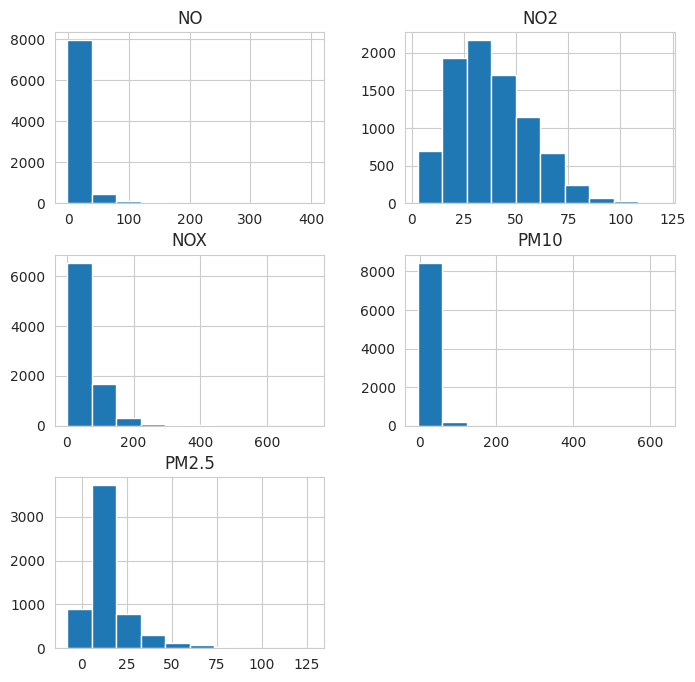

In [13]:
sns.set_style("whitegrid")
pvt_df.hist(figsize=(8,8))
plt.show()

8. Run the following code and comment on what each line does:

In [15]:
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True) #generates a new data frame in which the ReadingDateTIme column is split and a space is used as a delimiter. ' ' The str.split function splits the text. They create new columns whose value is one of the split parts.
datetime_df.columns = ['Date','Time'] # Assign date and time names to the columns of the new data frame generated in the previous line (datetim_df)
datetime_df # Displays/prints datetime_df
date_df = datetime_df.Date.str.split('/',expand=True) #Similar to the first line, this line splits the date column within datetime_df by the / delimiter
date_df.columns = ['Day','Month','Year'] #Assigns column names to the date_df data frame (day,month,year)
date_df # Displays/prints date_df
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year']) #Joins and deletes columns, air_df.join(date_df) joins the two data frames contained in this instruction, as a result the columns day, month and year are added, then join(datetime_df.Time) adds the time column, finally drop(columns=['ReadingDateTime','Year']) removes the Readingdatetime and year columns from the resulting data frame
air_df = air_df.set_index(['Month','Day','Time','Species']) # Sets an index of multiple columns defined by month, day time and species, which means that each row will be identified by a combination of month, day, time and pollutant.
air_df # Displays/prints air_df

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[40570 rows x 1 columns]

9. Execute the following statement and compare its output with that of the previous code (exercise 8). Are they the same?

In [16]:
air_df.unstack() # Although their results are similar, they are not the same. The data is presented differently. In Exercise 8, four columns are obtained, and an index is generated to define each value. In this exercise, we only obtain three columns and one row, both of which act as indexes. The results may be very similar in practice, but they are not the same.

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8737 rows x 5 columns]

10. Explain the differences and similarities between the `melt()/pivot()` pair and the `stack()/unstack()` pair. If you had to choose a counterpart to `melt()` between `stack()/unstack()`, which would you choose? Why?

Melt vs. Pivot
Similarities
Both are used to reshape a DataFrame, either from width to length or vice versa. Both functions offer great flexibility to customize the data transformation through various parameters.
Differences
Melt is used to transform a DataFrame from a wide format (where each variable is in a different column) to a long format (where there is one column for variables and another for values). It is useful for preparing data for more detailed analysis.
Pivot is used to transform a DataFrame from a long format to a wide format. It is useful for creating pivot tables or summarizing data by category.

Stack vs. Unstack

Similarities
Both functions are used to reshape a DataFrame, moving data between rows and columns. Both work primarily with DataFrames that have multiple indexes, i.e., multiple levels in the row index.

Differences
They are inverse operations. Applying stack() and then unstack() (or vice versa) to a DataFrame generally returns the original DataFrame. That is, the affected level is different, and so is the direction of movement.

A counterpart to melt?

Well, if it's one of the two, perhaps unstack is necessary, since its essence is to return the DataFrame to its original state, but I really think it would be a combination of both.